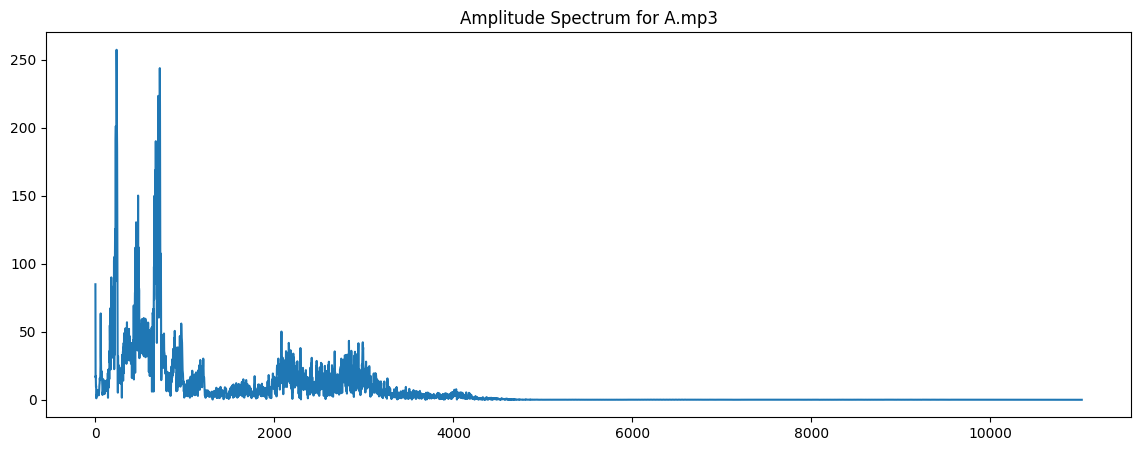

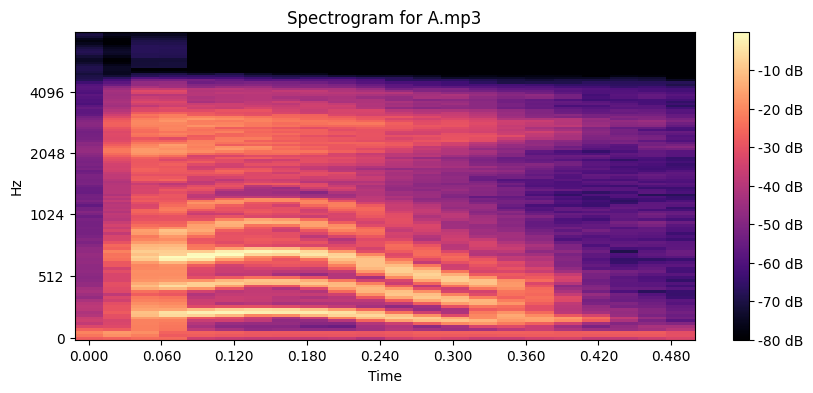

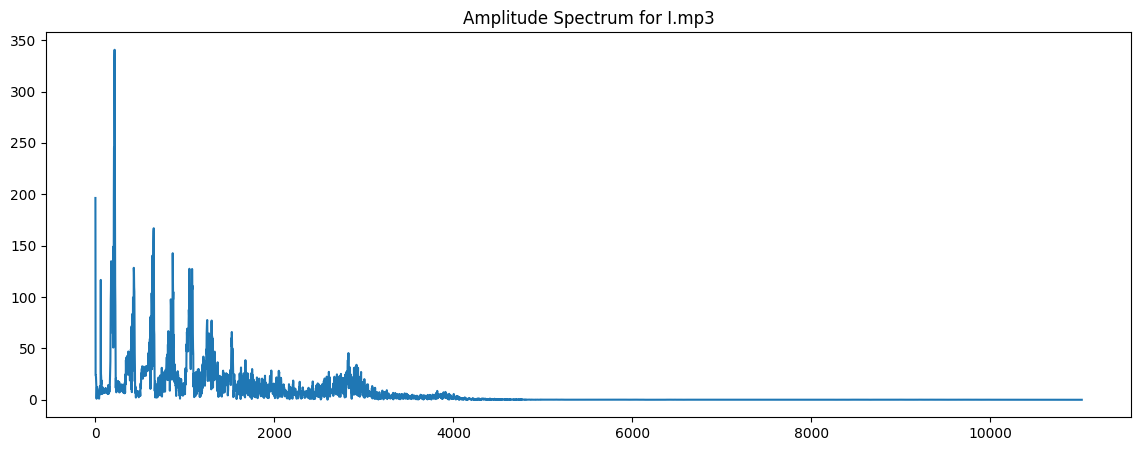

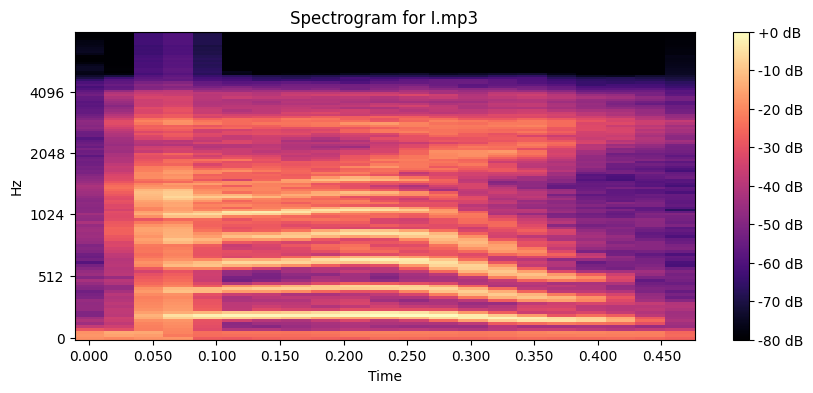

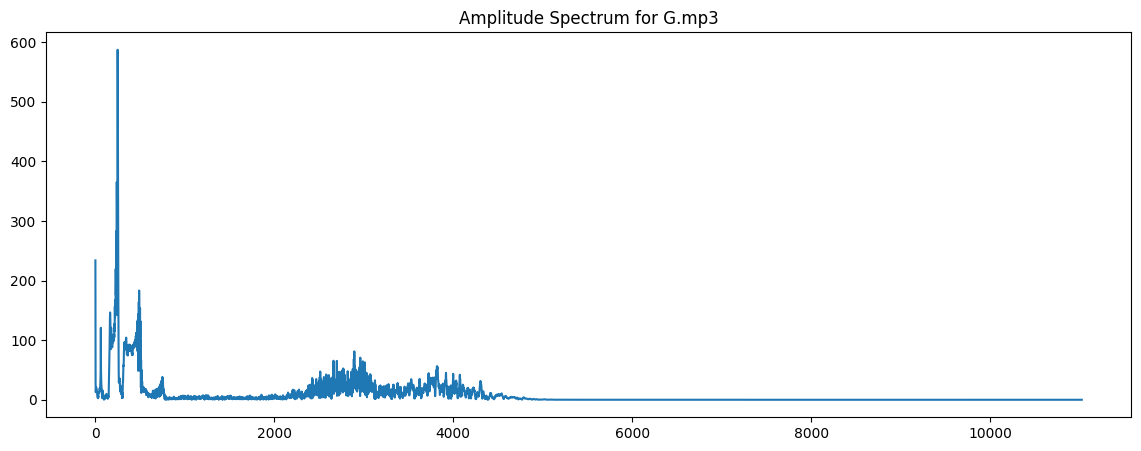

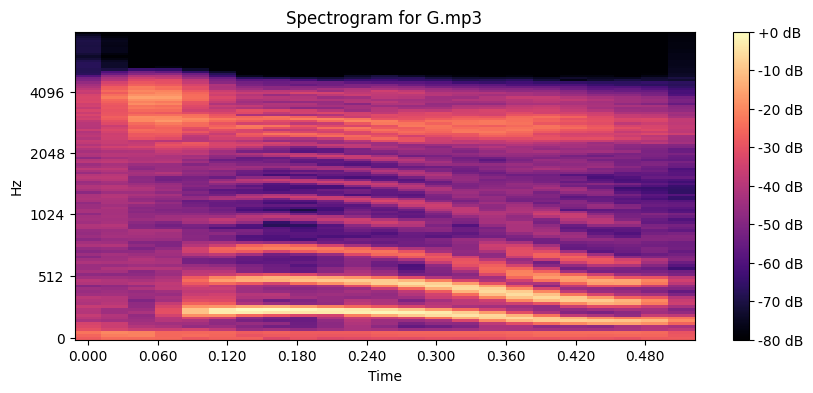

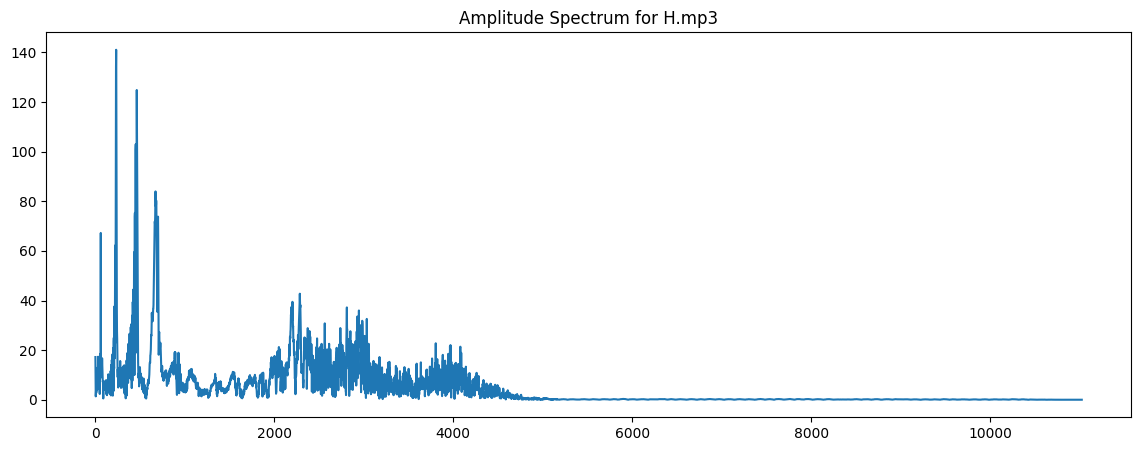

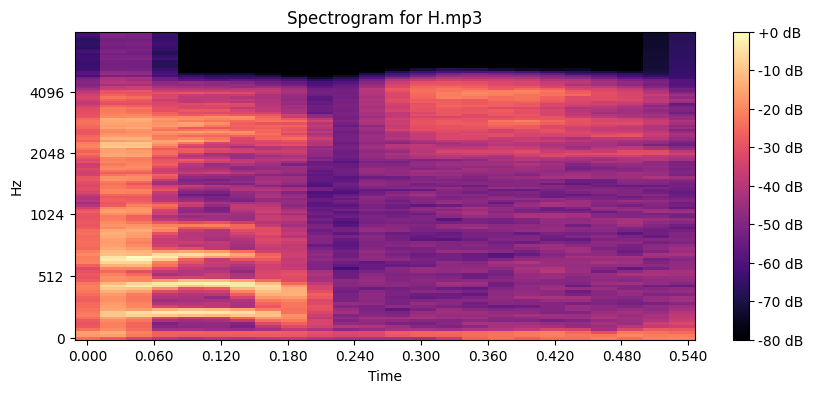

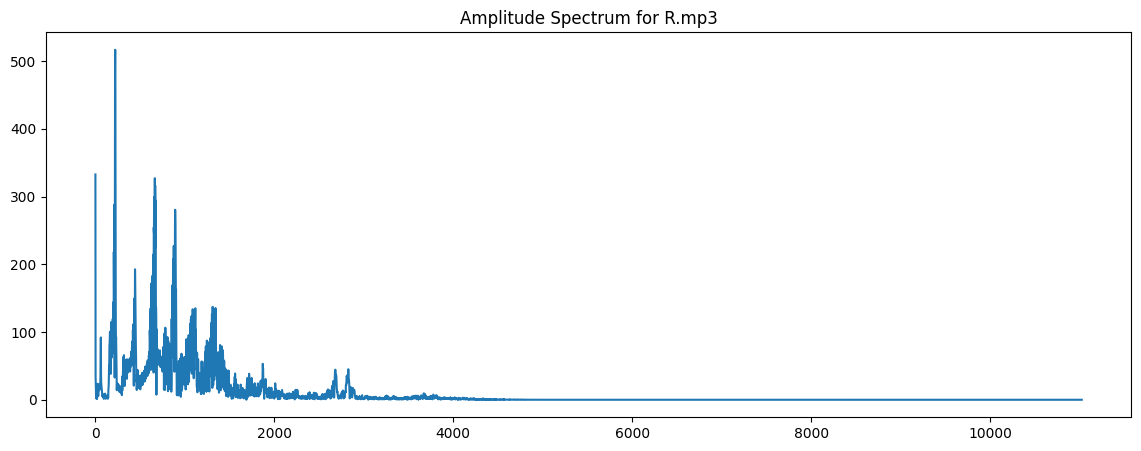

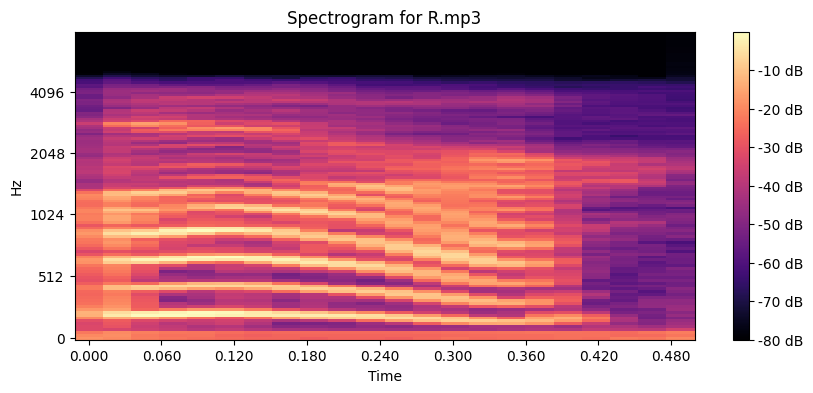

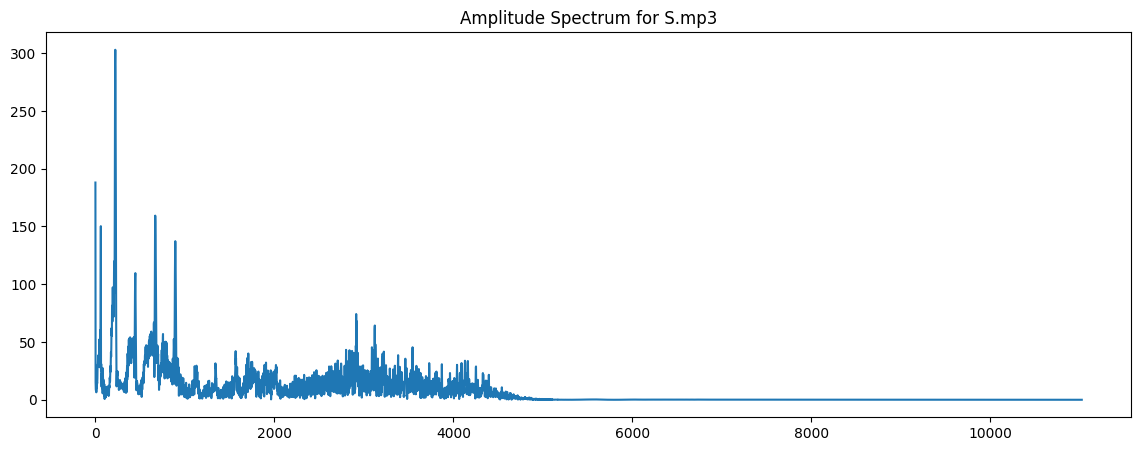

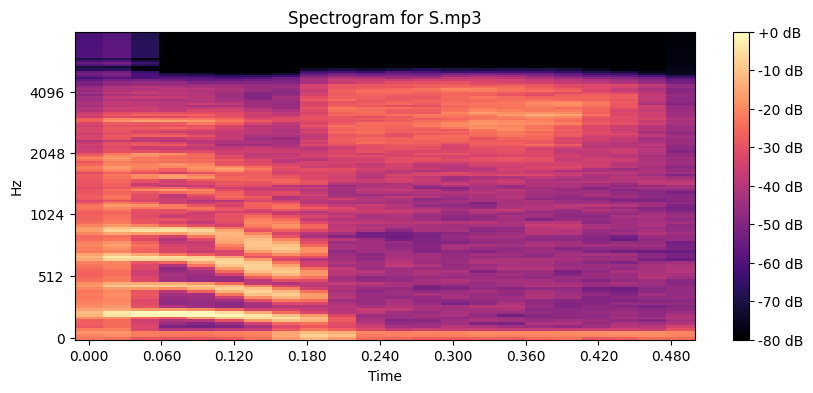

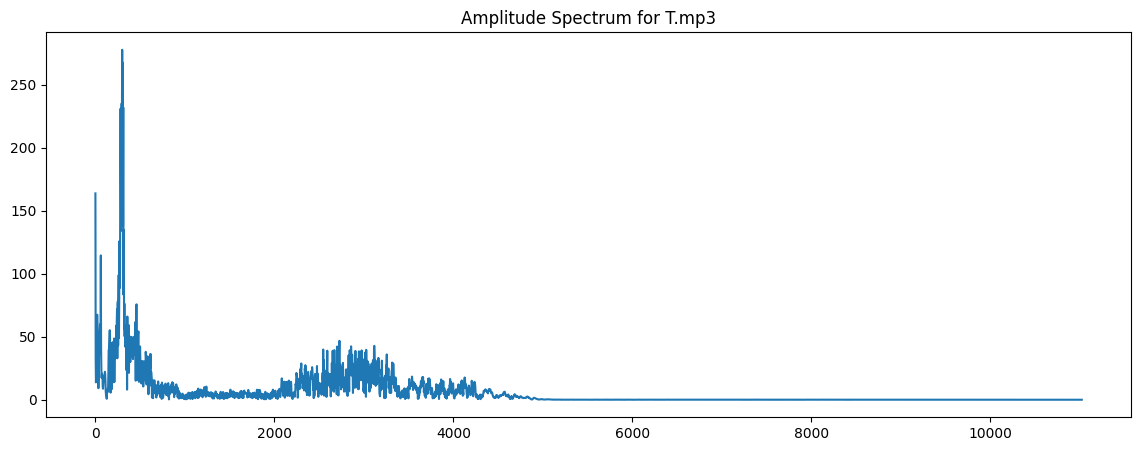

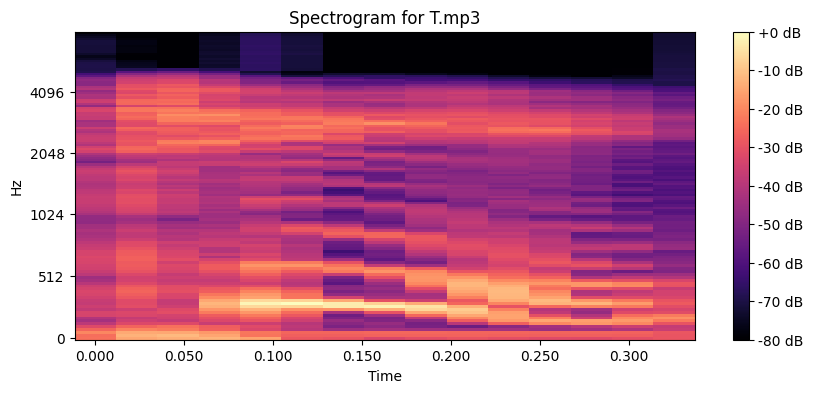

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# List of vowel and consonant files
vowel_files = ['A.mp3', 'I.mp3']
consonant_files = ['G.mp3', 'H.mp3', 'R.mp3', 'S.mp3', 'T.mp3']

def process_files(file_list):
    for file in file_list:
        # Load the audio file
        signal, sr = librosa.load(file)

        # Perform FFT
        fft = np.fft.fft(signal)

        # Compute absolute value of FFT (for amplitude spectrum)
        spectrum = np.abs(fft)

        # Plot the amplitude spectrum
        plt.figure(figsize=(14, 5))
        freq = np.linspace(0, sr, len(spectrum))
        plt.plot(freq[:int(len(freq)/2)], spectrum[:int(len(spectrum)/2)])  # Plot only the positive frequencies
        plt.title(f'Amplitude Spectrum for {file}')
        plt.show()

        # Generate and plot the spectrogram
        S = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=128, fmax=8000)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Spectrogram for {file}')
        plt.show()

# Process vowel and consonant files
process_files(vowel_files)
process_files(consonant_files)